In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import os
import json
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/'멀티캠퍼스 5조'/2.데이터

df = pd.read_csv('통합데이터_표준화.csv')
df.head(3)

/content/drive/.shortcut-targets-by-id/1Mz49-WiynxJxHmmXYuWSqduV3-jd-BC7/멀티캠퍼스 5조/2.데이터


,출발지구군,출발지상세,예정일시,승차일시,시간대_30분,요일,월,화,수,목,금,토,일,언급량,강수량,적설량,평균속도,운행차량수,대기시간,대기시간_초
0,강북구,송천동,2019-01-01 05:20:00,2019-01-01 05:38:53,10,1,0,1,0,0,0,0,0,0.060216,0.0,0.0,0.876199,0.000000,18.0,1133.0
1,은평구,역촌동,2019-01-01 07:00:00,2019-01-01 07:35:42,14,1,0,1,0,0,0,0,0,0.527435,0.0,0.0,0.982563,0.275439,35.0,2142.0
2,도봉구,창제3동,2019-01-01 07:00:00,2019-01-01 07:30:04,14,1,0,1,0,0,0,0,0,0.590379,0.0,0.0,0.904969,0.275439,30.0,1804.0


In [ ]:
# 년도 추가 
add_lst = []
for i in tqdm(df.index):
    add_lst.append(df.loc[i, '예정일시'][:4])

100%|██████████| 2991602/2991602 [01:10<00:00, 42536.61it/s]


In [ ]:
df['year'] = add_lst

In [ ]:
temp19 = df[(df.year == '2019')]
temp20 = df[(df.year == '2020')]
temp22 = df[(df.year == '2022')]

#### 2019 시계열 분석

In [ ]:
temp19 = temp19[['예정일시', '대기시간']].copy()

temp19['예정일시'] = pd.to_datetime(temp19['예정일시'])
temp19.set_index('예정일시', inplace = True)
temp19.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 849289 entries, 2019-01-01 05:20:00 to 2019-12-31 21:38:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대기시간    849289 non-null  float64
dtypes: float64(1)
memory usage: 13.0 MB


<BarContainer object of 24 artists>

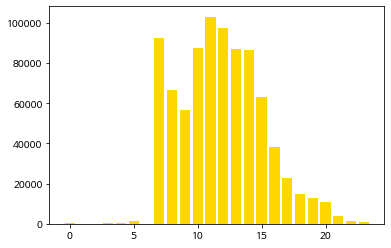

In [ ]:
h_sort = temp19.index.hour.value_counts().sort_index()
plt.bar(h_sort.index, h_sort, color = 'gold')

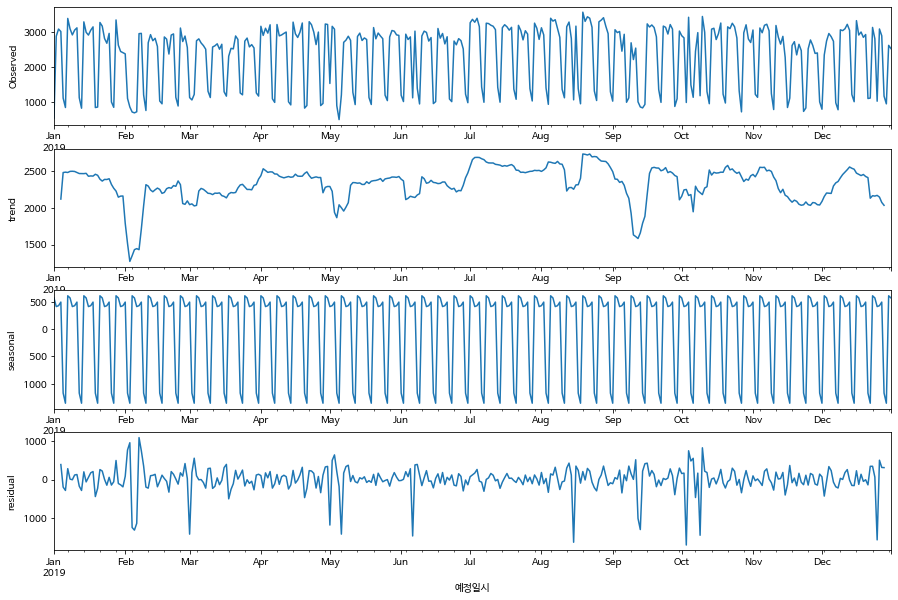

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = temp19.resample('D')['대기시간'].count()
result = seasonal_decompose(ts, model = 'Additive')

def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15, 10))
    decompose_result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('trend')
    decompose_result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('seasonal')
    decompose_result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('residual')

plot_decompose(result)

# 원본 데이터
# 추세성분 = 글쎄
# 계정성분 = 있음 주별 주기로 보임
# 불규칙성분

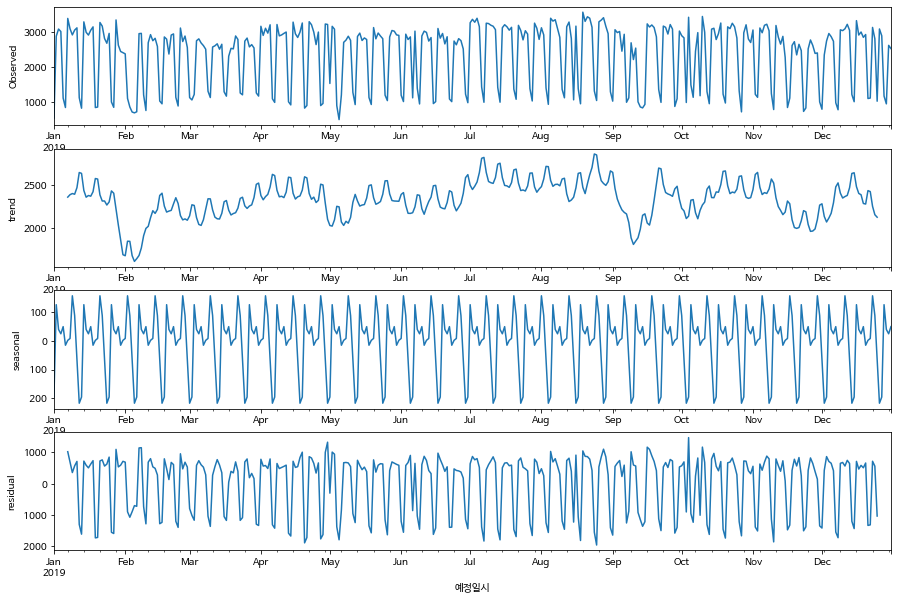

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = temp19.resample('d')['대기시간'].count()
result = seasonal_decompose(ts, model = 'Additive', freq = 12)

def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15, 10))
    decompose_result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('trend')
    decompose_result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('seasonal')
    decompose_result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('residual')

plot_decompose(result)

# 원본 데이터
# 추세성분 = 글쎄
# 계정성분 = 있음 주별 주기로 보임
# 불규칙성분

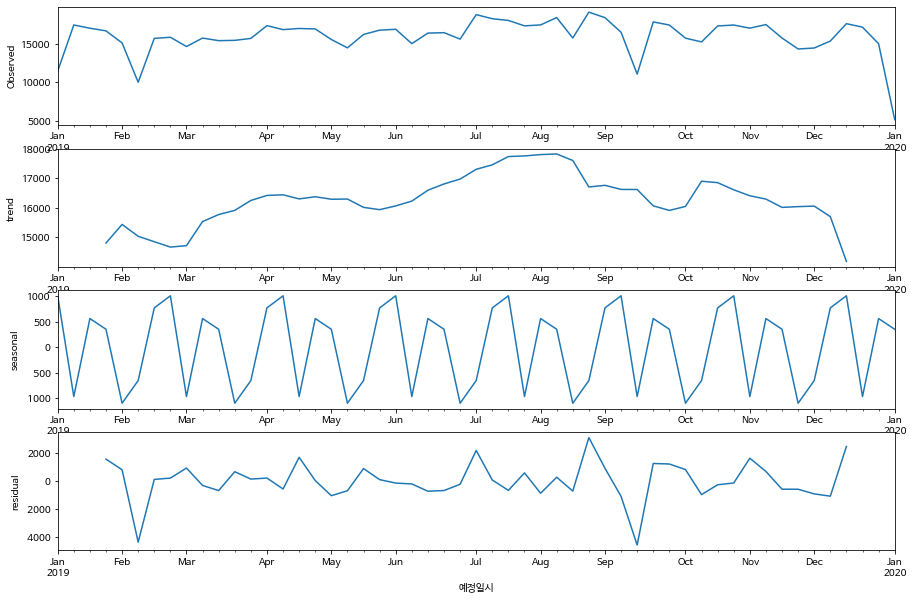

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = temp19.resample('w')['대기시간'].count()
result = seasonal_decompose(ts, model = 'Additive', freq = 7)

def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15, 10))
    decompose_result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('trend')
    decompose_result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('seasonal')
    decompose_result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('residual')

plot_decompose(result)

# 원본 데이터
# 추세성분 = 글쎄
# 계정성분 = 있음 주별 주기로 보임
# 불규칙성분

#### 2020 시계열 분석

In [ ]:
temp20 = temp20[['예정일시', '대기시간']].copy()

temp20['예정일시'] = pd.to_datetime(temp20['예정일시'])
temp20.set_index('예정일시', inplace = True)
temp20.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 797465 entries, 2020-01-01 07:00:00 to 2020-12-31 23:42:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대기시간    797465 non-null  float64
dtypes: float64(1)
memory usage: 12.2 MB


<BarContainer object of 24 artists>

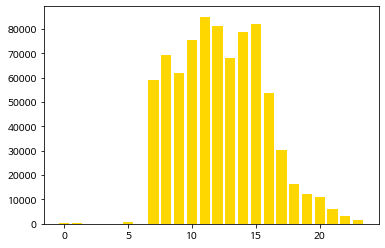

In [ ]:
h_sort = temp20.index.hour.value_counts().sort_index()
plt.bar(h_sort.index, h_sort, color = 'gold')

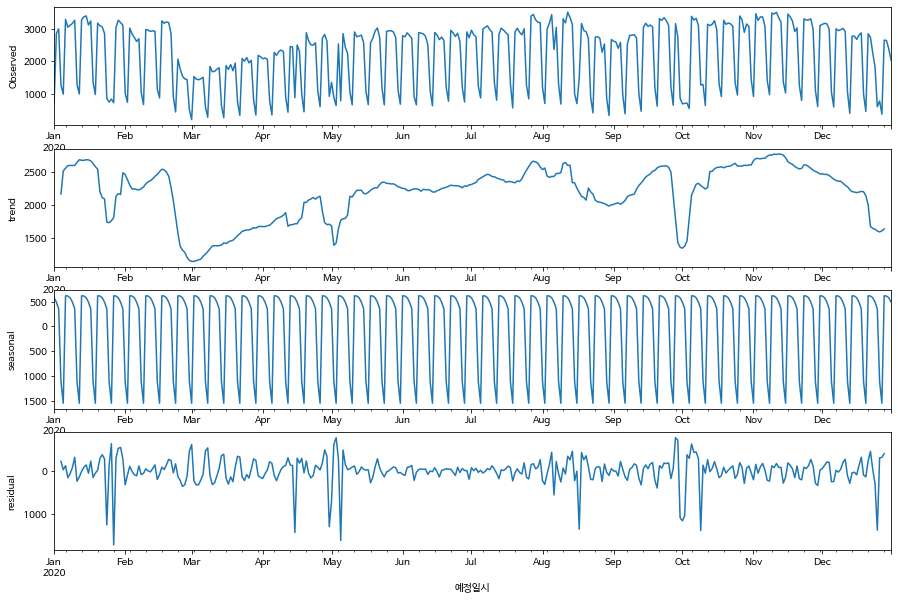

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = temp20.resample('D')['대기시간'].count()
result = seasonal_decompose(ts, model = 'Additive')

def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15, 10))
    decompose_result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('trend')
    decompose_result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('seasonal')
    decompose_result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('residual')

plot_decompose(result)

# 원본 데이터
# 추세성분 = 글쎄
# 계정성분 = 있음 주별 주기로 보임
# 불규칙성분

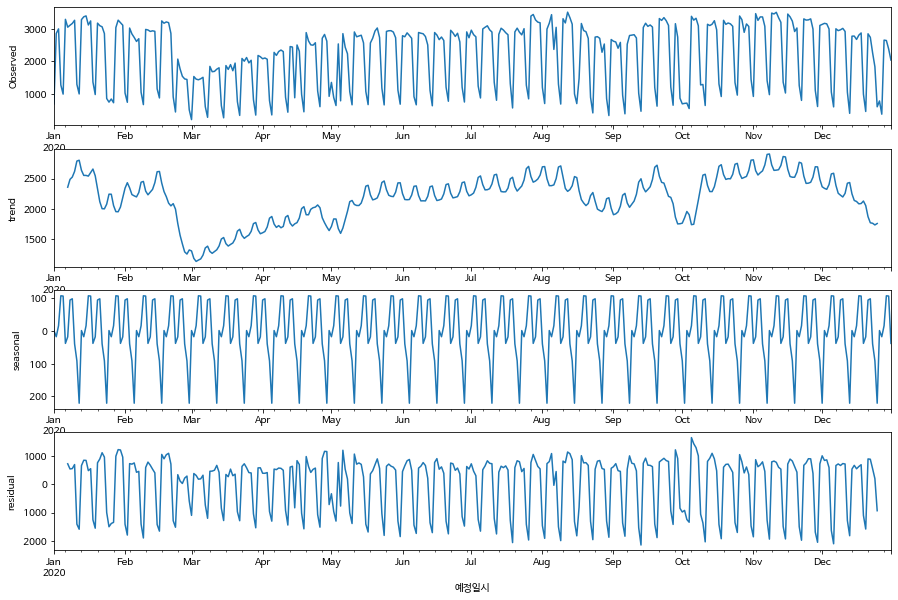

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = temp20.resample('d')['대기시간'].count()
result = seasonal_decompose(ts, model = 'Additive', freq = 12)

def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15, 10))
    decompose_result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('trend')
    decompose_result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('seasonal')
    decompose_result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('residual')

plot_decompose(result)

# 원본 데이터
# 추세성분 = 글쎄
# 계정성분 = 있음 주별 주기로 보임
# 불규칙성분

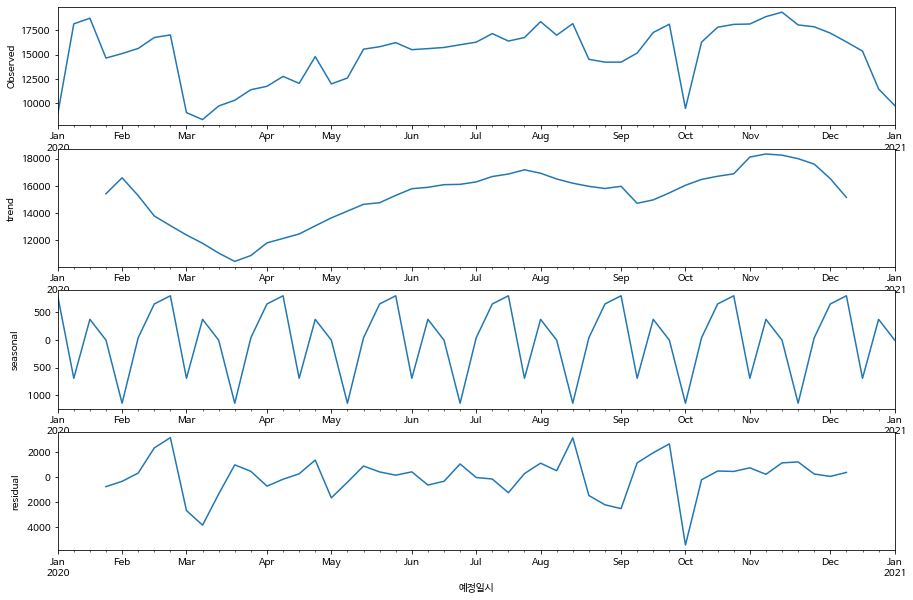

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = temp20.resample('w')['대기시간'].count()
result = seasonal_decompose(ts, model = 'Additive', freq = 7)

def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15, 10))
    decompose_result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('trend')
    decompose_result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('seasonal')
    decompose_result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('residual')

plot_decompose(result)

# 원본 데이터
# 추세성분 = 글쎄
# 계정성분 = 있음 주별 주기로 보임
# 불규칙성분

#### 2021시계열 분석

In [ ]:
temp21 = df[(df.year == '2021')][['예정일시', '대기시간']].copy()

In [ ]:
temp21['예정일시'] = pd.to_datetime(temp21['예정일시'])
temp21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004982 entries, 1646754 to 2651735
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   예정일시    1004982 non-null  datetime64[ns]
 1   대기시간    1004982 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 MB


In [ ]:
temp21.set_index('예정일시', inplace = True)

In [ ]:
temp21.index.day_name().value_counts()

Tuesday      182311
Thursday     180241
Wednesday    177401
Monday       176764
Friday       173295
Saturday      69123
Sunday        45847
Name: 예정일시, dtype: int64

<BarContainer object of 24 artists>

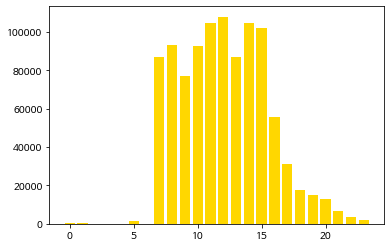

In [ ]:
h_sort = temp21.index.hour.value_counts().sort_index()
plt.bar(h_sort.index, h_sort, color = 'gold')

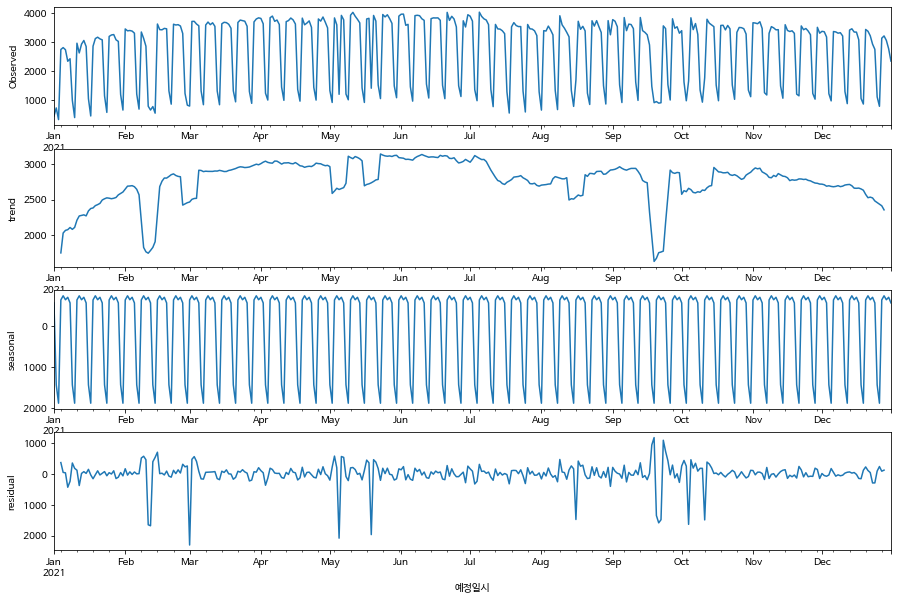

In [ ]:
ts = temp21.resample('D')['대기시간'].count()
result = seasonal_decompose(ts, model = 'Additive')

def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15, 10))
    decompose_result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('trend')
    decompose_result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('seasonal')
    decompose_result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('residual')

plot_decompose(result)

# 원본 데이터
# 추세성분 = 글쎄
# 계정성분 = 있음 주별 주기로 보임
# 불규칙성분

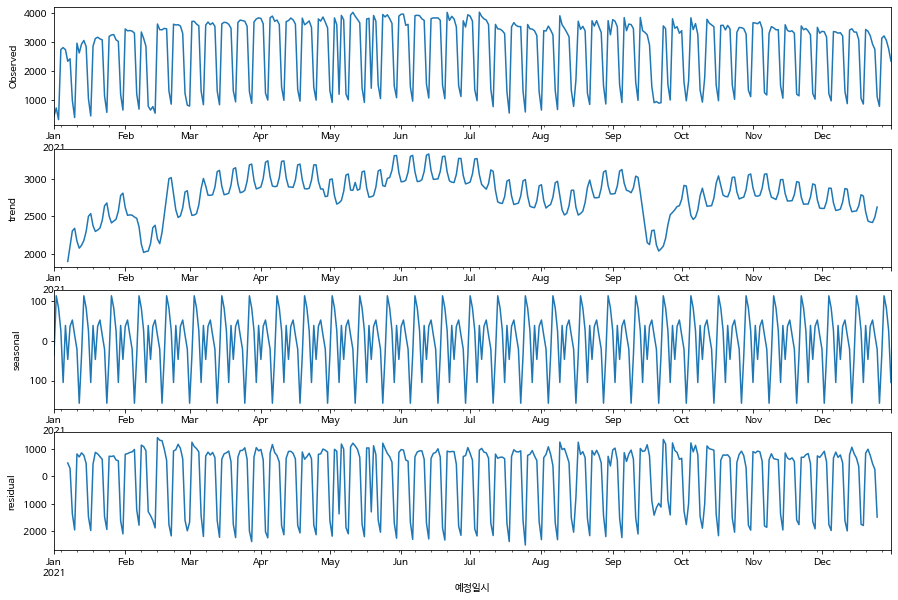

In [ ]:
ts = temp21.resample('d')['대기시간'].count()
result = seasonal_decompose(ts, model = 'Additive', freq = 12)

def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15, 10))
    decompose_result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('trend')
    decompose_result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('seasonal')
    decompose_result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('residual')

plot_decompose(result)

# 원본 데이터
# 추세성분 = 글쎄
# 계정성분 = 있음 주별 주기로 보임
# 불규칙성분

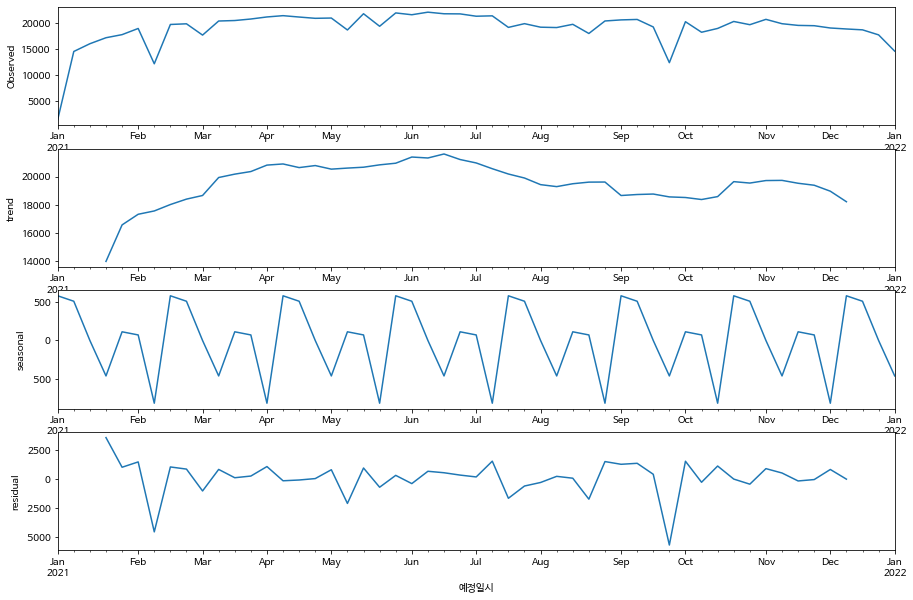

In [ ]:
ts = temp21.resample('w')['대기시간'].count()
result = seasonal_decompose(ts, model = 'Additive', freq = 7)

def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15, 10))
    decompose_result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('trend')
    decompose_result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('seasonal')
    decompose_result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('residual')

plot_decompose(result)

# 원본 데이터
# 추세성분 = 글쎄
# 계정성분 = 있음 주별 주기로 보임
# 불규칙성분

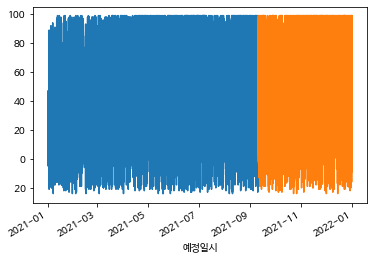

In [ ]:
y_train = temp['대기시간'][:int(0.7*len(temp))]
y_test = temp['대기시간'][int(0.7*len(temp)):]
y_train.plot()
y_test.plot()

In [ ]:
#!pip install pmdarima

In [ ]:
from pmdarima.arima import ndiffs
import pmdarima as pm

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


In [ ]:
model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 7       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6150979.373, Time=19.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5957804.635, Time=13.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5740568.289, Time=66.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6150977.373, Time=5.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5739289.092, Time=135.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5738606.275, Time=167.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5881882.397, Time=18.87 sec


In [ ]:
temp = temp2[temp2.index.year == 2021]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(temp, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.대기시간   No. Observations:              1004981
Model:                 ARIMA(0, 1, 1)   Log Likelihood            -4144099.377
Method:                       css-mle   S.D. of innovations             14.949
Date:                Sun, 15 May 2022   AIC                        8288204.754
Time:                        16:53:57   BIC                        8288240.215
Sample:                             1   HQIC                       8288214.511
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.857e-05      0.001      0.043      0.966      -0.002       0.002
ma.L1.D.대기시간    -0.9240      0.000  -2006.194      0.000      -0.925      -0.923
                                    Roots   

In [ ]:
model = ARIMA(temp, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.대기시간   No. Observations:              1004981
Model:                 ARIMA(0, 1, 1)   Log Likelihood            -4144099.378
Method:                       css-mle   S.D. of innovations             14.949
Date:                Sun, 15 May 2022   AIC                        8288202.755
Time:                        17:00:21   BIC                        8288226.396
Sample:                             1   HQIC                       8288209.260
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ma.L1.D.대기시간    -0.9240      0.000  -2006.213      0.000      -0.925      -0.923
                                    Roots                                    
                  Real          Imaginary      

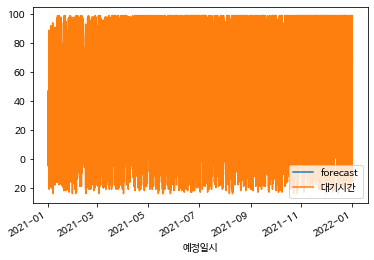

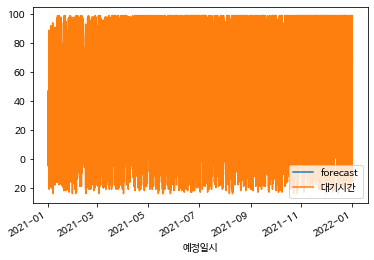

In [ ]:
model_fit.plot_predict()

#### 2022 시계열분석

In [ ]:
temp22 = temp22[['예정일시', '대기시간']].copy()

temp22['예정일시'] = pd.to_datetime(temp22['예정일시'])
temp22.set_index('예정일시', inplace = True)
temp22.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 339866 entries, 2022-01-01 00:05:00 to 2022-05-02 23:43:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대기시간    339866 non-null  float64
dtypes: float64(1)
memory usage: 5.2 MB


<BarContainer object of 24 artists>

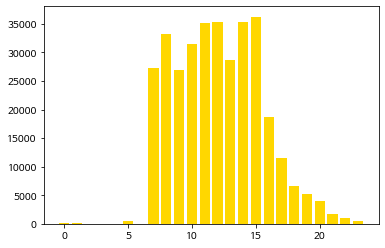

In [ ]:
h_sort = temp22.index.hour.value_counts().sort_index()
plt.bar(h_sort.index, h_sort, color = 'gold')

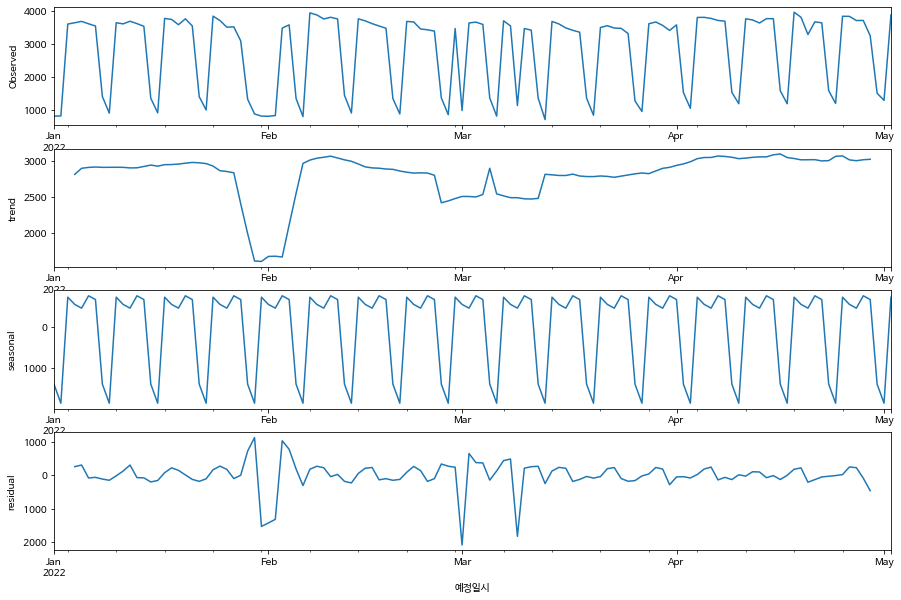

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = temp22.resample('D')['대기시간'].count()
result = seasonal_decompose(ts, model = 'Additive',freq = 7)

def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15, 10))
    decompose_result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('trend')
    decompose_result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('seasonal')
    decompose_result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('residual')

plot_decompose(result)

# 원본 데이터
# 추세성분 = 글쎄
# 계정성분 = 있음 주별 주기로 보임
# 불규칙성분

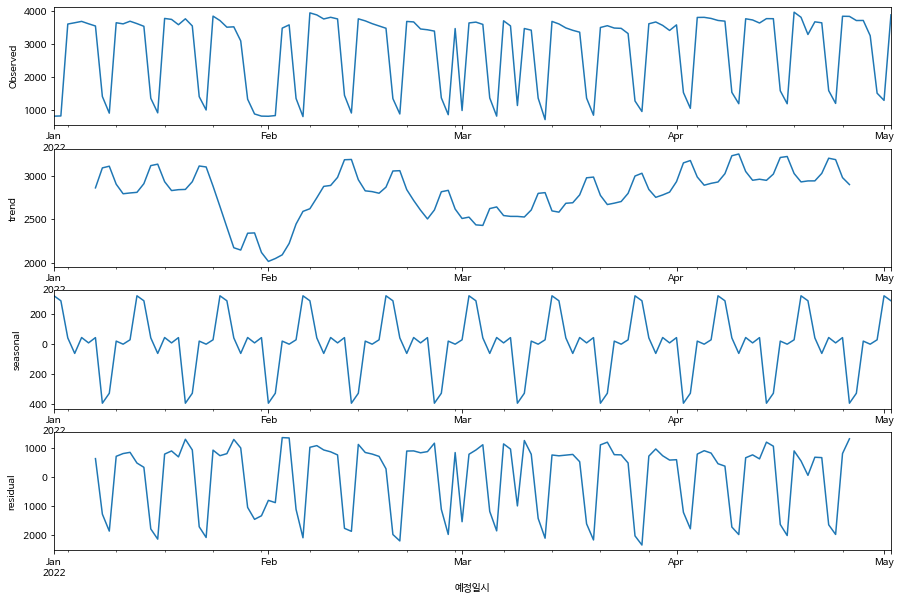

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = temp22.resample('d')['대기시간'].count()
result = seasonal_decompose(ts, model = 'Additive', freq = 12)

def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15, 10))
    decompose_result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('trend')
    decompose_result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('seasonal')
    decompose_result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('residual')

plot_decompose(result)

# 원본 데이터
# 추세성분 = 글쎄
# 계정성분 = 있음 주별 주기로 보임
# 불규칙성분

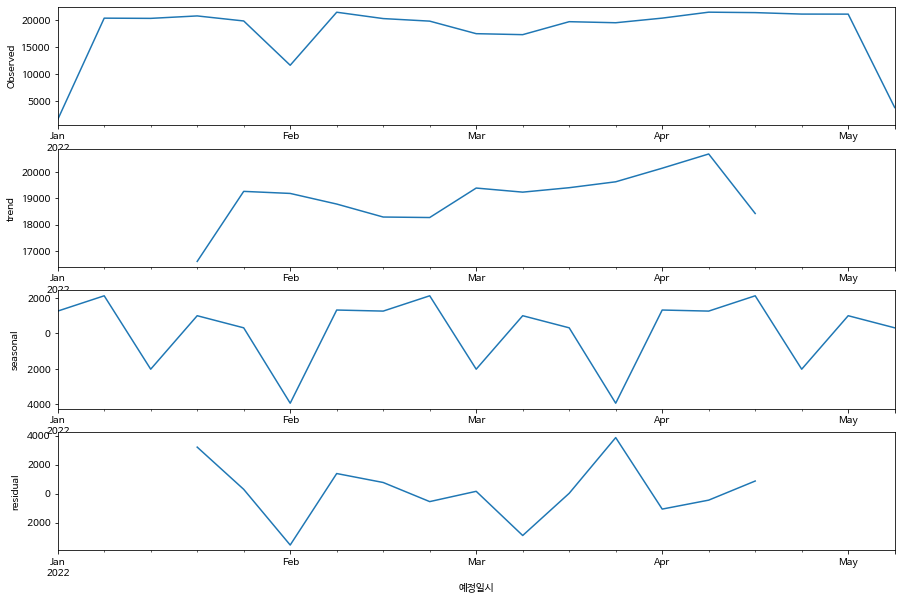

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = temp22.resample('w')['대기시간'].count()
result = seasonal_decompose(ts, model = 'Additive', freq = 7)

def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15, 10))
    decompose_result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('trend')
    decompose_result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('seasonal')
    decompose_result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('residual')

plot_decompose(result)

# 원본 데이터
# 추세성분 = 글쎄
# 계정성분 = 있음 주별 주기로 보임
# 불규칙성분